In [1]:
import numpy as np # importing numpy library 
import pandas as pd # pandas library to load and create data frame and prepare data

In [2]:
#importing necessary libraries for natural language processing
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk

import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable



In [5]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package words is alrea

True

In [7]:
#loading of data
columns = ["Id","Entity","Target","Text"]
data = pd.read_csv("twitter_training.csv",names=columns,header=None)

In [8]:
#first five records
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
#will keep only relevant features that will be used by the classifier
df = data[["Text","Target"]]

In [10]:
df.head()

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [11]:
#we can see that our data frame consist of 74682 records and 2 columns
df.shape

(74682, 2)

In [12]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73996 non-null  object
 1   Target  74682 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [13]:
#Need to remove duplicates to ensure have better accuracy
df= df.drop_duplicates()

In [14]:
#we remove the null value that we found
df = df.dropna()

<AxesSubplot:xlabel='Target', ylabel='count'>

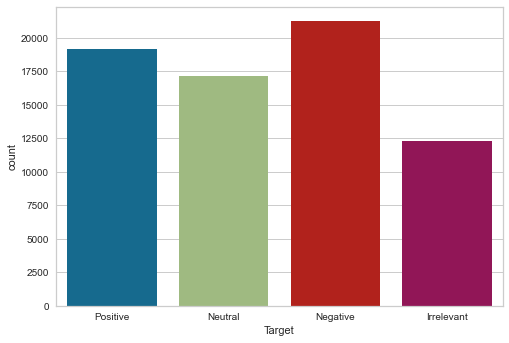

In [15]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Target",data=df)

In [16]:
#converting classes to numeric 
#we created an empty list and appended values to the list to represent a certain class
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [17]:
#new feature added named as sentiment with numeric values to represen target
df.head()

,Text,Target,Sentiment
0,im getting on borderlands and i will murder yo...,Positive,1
1,I am coming to the borders and I will kill you...,Positive,1
2,im getting on borderlands and i will kill you ...,Positive,1
3,im coming on borderlands and i will murder you...,Positive,1
4,im getting on borderlands 2 and i will murder ...,Positive,1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

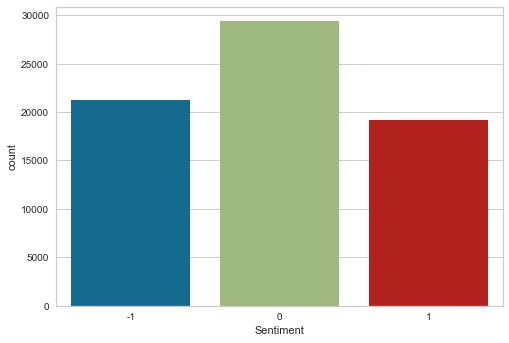

In [18]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Sentiment",data=df)

In [19]:
#for text classification, we need to take of very common english words, that can occur several times in a sentence
#we are going to use stopwords for this
stop_words = set(stopwords.words("english"))

In [20]:
#list of stopwords, these are very commonly used english words that can affect prediction when doing text classsification
#need to cater for this
print(stop_words)

{'when', 'yourself', 'same', 'o', 'have', 'down', 'where', 'wasn', 'does', 'm', "couldn't", "it's", 'my', 'yourselves', 'doing', 'there', 'at', 'into', "you'll", 'to', 'myself', 'll', 'himself', 'now', "you've", 'be', 'too', 'during', 'so', 'on', 'only', 'some', 'such', 'was', "hasn't", 'that', 'themselves', 'our', 'their', 'me', 'your', 'its', 'until', 'because', 'the', "doesn't", "shouldn't", 'do', 'who', "you'd", 'weren', 'further', 'ain', 'ours', 'aren', 'while', 'by', "mustn't", 've', 'y', 'his', 'off', 'here', 'having', 'ourselves', 'haven', 'i', "wasn't", "isn't", 'is', "hadn't", 'out', 'which', "weren't", 'were', 'then', "won't", 'didn', "that'll", 'a', 'you', "don't", 'wouldn', 'd', 'very', 'will', 'herself', "haven't", 'won', 'few', 'own', 'mustn', 'this', 'hasn', "aren't", 'they', "should've", 'whom', "wouldn't", 'him', 'below', 'theirs', 'as', 'from', 'can', 'of', 'between', 'those', 'what', 'don', 'she', "you're", 'each', 's', 'nor', 'mightn', 'shouldn', 'up', 'once', 'has

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

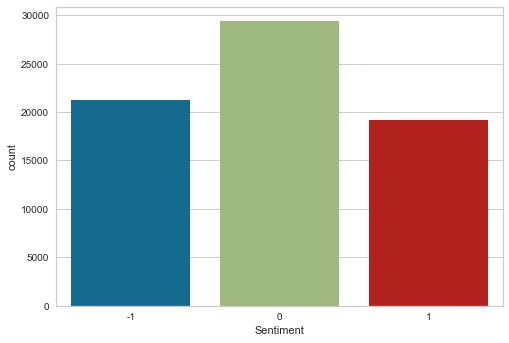

In [21]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Sentiment",data=df)

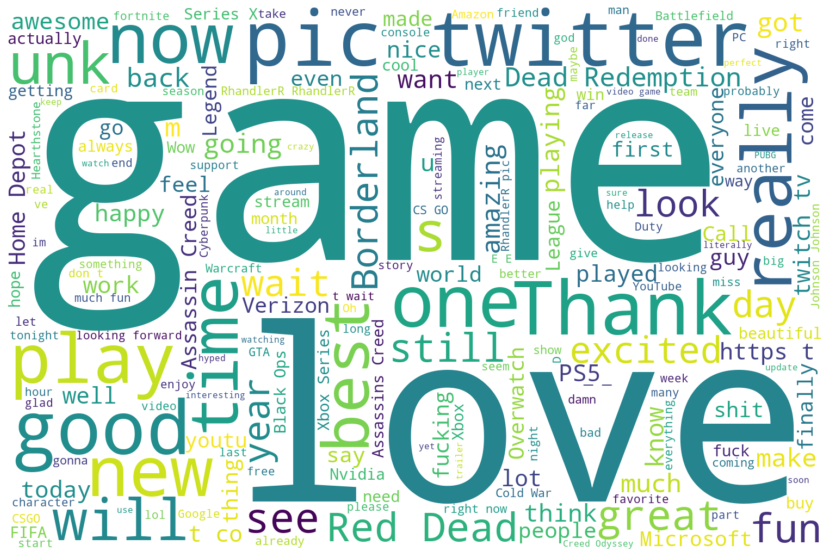

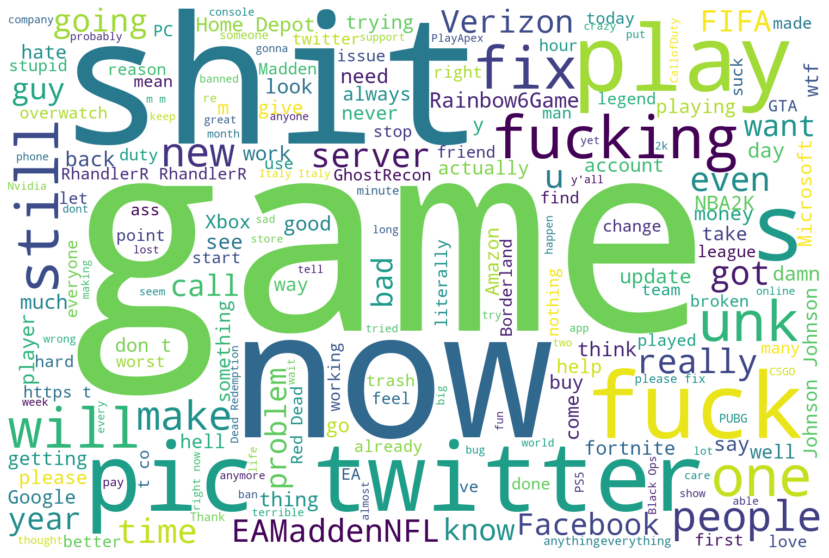

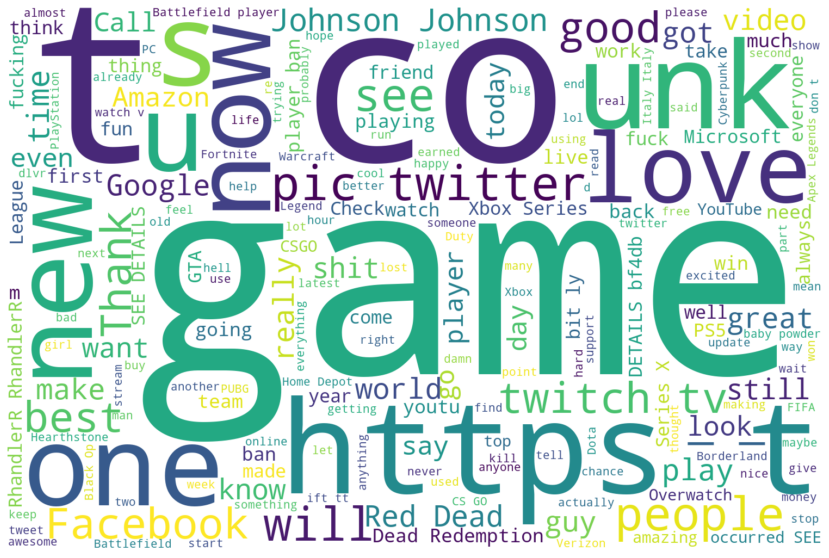

In [22]:
# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==-1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==0]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Text Cleaner

In [23]:
#this code will replace all digits found in text with nothin for example borderland 2 --> borderland
df["Text"] = df["Text"].str.replace("\d","")

In [24]:
#this function will first tokenize the data, which means will create list of words from the sentences
#to tackle punctuations we can use regular expressions, translation or simply use isalpha() function bearing in mind that space 
#is eliminated with this function we will tokenize the text first, to note that if there is a massive dataset translate is the most efficient function
#https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
#after this the next step will be to remove stop words from the words
#next step will be to apply lemmatization,porter lemmatizer has been used in our case, for example words like coming,came,comes --> come

def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)

In [ ]:
df["Text"] = df["Text"].apply(cleaner)
df["Text"].head()

In [ ]:
df["Text"]=df["Text"].str.replace("im","")
df["Text"].head()

## Rare Words

In [ ]:
rare_words = pd.Series(" ".join(df["Text"]).split()).value_counts()
rare_words

In [ ]:
rare_words = rare_words[rare_words <= 2]

In [ ]:
df["Text"] = df["Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

## Word Cloud

In [ ]:
# plt.figure(figsize=(16,12))
# wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Text']))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df["Text"]
y = df["Sentiment"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42)

## Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_test_count = vt.transform(X_test)

In [ ]:
print(X_train_count.toarray())
X_train_count

## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators = 100)
ABC.fit(X_train_count,y_train)

In [ ]:
ABC_pred = ABC.predict(X_test_count)
ABC_train_pred = ABC.predict(X_train_count)

In [ ]:
# Classification Report
cr = classification_report(y_test,ABC_pred)
print(cr)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, ABC_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.title('Confusion matrix of AdaBoostClassifier', fontsize = 16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
viz = PrecisionRecallCurve(ABC,classes=ABC.classes_,per_class=True,cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
viz = ROCAUC(ABC, classes=ABC.classes_, per_class=True,map="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_count,y_train)
dtc_pred = dtc.predict(X_test_count)
dtc_train_pred = dtc.predict(X_train_count)

In [ ]:
# Classification Report
cr = classification_report(y_test,dtc_pred)
print(cr)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, dtc_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.title('Confusion matrix of Decision Tree Classifier', fontsize = 16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
viz = PrecisionRecallCurve(dtc,classes=dtc.classes_,per_class=True,cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
viz = ROCAUC(dtc, classes=dtc.classes_, per_class=True,map="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

##  Comparison

In [ ]:
pred_df = pd.DataFrame({"ADB":[accuracy_score(y_test,ABC_pred)],
                      "dtc": [accuracy_score(y_test,dtc_pred)]})

train_pred = pd.DataFrame({"ADB":[accuracy_score(y_test,ABC_pred)],
                      "dtc": [accuracy_score(y_test,dtc_pred)]})

In [ ]:
pred_df.plot(kind="barh")
train_pred.plot(kind="barh")

In [ ]:
#using ANN to apply deep learning technique
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils.vis_utils import plot_model

In [ ]:
# fit a tokenizer (bow)
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# create and apply tokenizer on the training dataset
tokenizer = create_tokenizer(X_train)
X_train_set = tokenizer.texts_to_matrix(X_train, mode = 'freq')

In [ ]:
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(128, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
# create the model
n_words = X_train_set.shape[1]
model = define_model(n_words)

In [ ]:
#fit network
model.fit(X_train_set,y_train,epochs=500,batch_size=300,verbose=2)

In [ ]:
#using ANN to apply deep learning technique
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK')

tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.texts_to_sequences([X_train[0]])

In [ ]:
#padding
lengths = [len(t.split(' ')) for t in X]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [ ]:
#any tweet more than 50 words will be chopped
maxlen=40

In [ ]:
#all example will have same input size
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post',padding='post',maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, X_train)
padded_test_seq = get_sequences(tokenizer, X_test)

In [ ]:
padded_train_seq[0]

In [ ]:
len(y_train)

In [ ]:
len(padded_train_seq)

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(padded_train_seq,y_train,batch_size=32,epochs = 10, patience=3)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)), #output at every timestep
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')                                                     
        ])
        
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
# Bag of Words model
from keras.preprocessing.text import Tokenizer

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer